# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +65.03954683178                   -2.48    4.13s
  2   +58.74096321600        0.80       -1.39   10.6ms
  3   +44.37486887802        1.16       -1.03   44.7ms
  4   +35.37127145499        0.95       -0.89   13.7ms
  5   +16.20073161799        1.28       -0.72   34.0ms
  6   +11.09612123134        0.71       -0.85   13.0ms
  7   +9.123919688211        0.29       -0.71   10.3ms
  8   +7.712453350749        0.15       -0.64   12.9ms
  9   +7.059380974052       -0.19       -0.64   12.9ms
 10   +6.477498030199       -0.24       -0.67   12.8ms
 11   +6.132616768768       -0.46       -0.71   8.46ms
 12   +5.888249527103       -0.61       -0.73   11.3ms
 13   +5.708280700346       -0.74       -0.75   11.1ms
 14   +5.574890718216       -0.87       -0.80   8.48ms
 15   +5.499368341283       -1.12       -0.80   11.3ms
 16   +5.402154629576       -1.01       -0.78   11.2ms
 17   +5.32

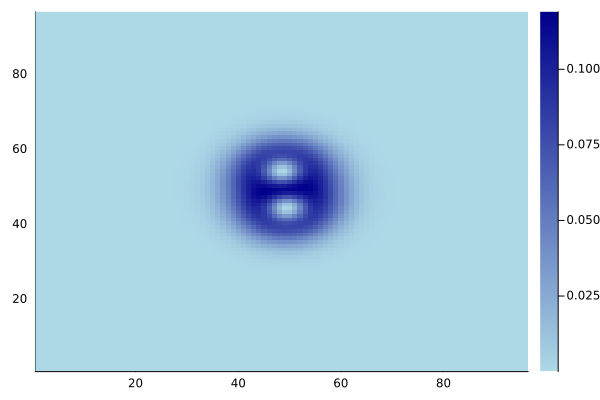

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π) = ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)